# Patch bicubico interpolante alla Hermite

Definiamo una figura per ricavare la matrice dei corner e delle derivate. Prendiamo come esempio un toroide

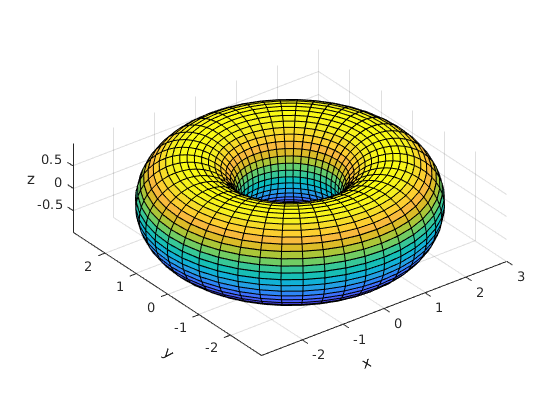

In [1]:
s_a = 0; s_b = 7;
s = linspace(s_a, s_b, 50);
t_a = 0; t_b = 7;
t = linspace(t_a, t_b, 50);
[ss, tt] = meshgrid(s, t);
x = (2 + cos(tt)).*cos(ss);
y = (2 + cos(tt)).*sin(ss);
z = sin(tt);
surf(x, y, z);axis equal; xlabel('x', 'Rotation',20); ylabel('y', 'Rotation',-40); zlabel('z', 'Rotation',0);
saveas(gcf,'Relazione/img/toro','epsc');

Prendiamo solo una porzione di questo delimitata dai parametri $s_a$, $s_b$, $t_a$ e $t_b$

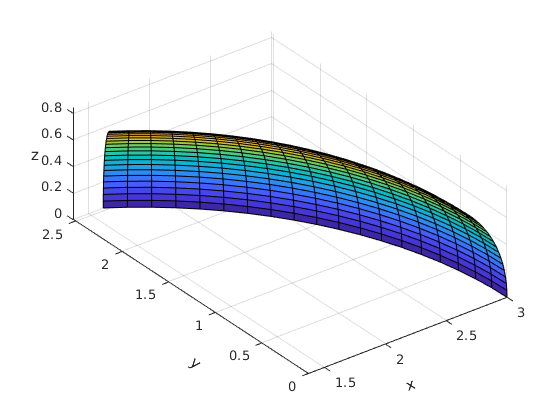

In [2]:
s_a = 0; s_b = 1;
s = linspace(s_a, s_b, 20);
t_a = 0; t_b = 1;
t = linspace(t_a, t_b, 20);
[ss, tt] = meshgrid(s, t);
x = (2 + cos(tt)).*cos(ss);
y = (2 + cos(tt)).*sin(ss);
z = sin(tt);
surf(x, y, z);axis equal; xlabel('x', 'Rotation',20); ylabel('y', 'Rotation',-40); zlabel('z', 'Rotation',0);

## Punti per l'interpolazione

Ricaviamo valori ($x$ $y$ $z$) dei corner su questa superficie

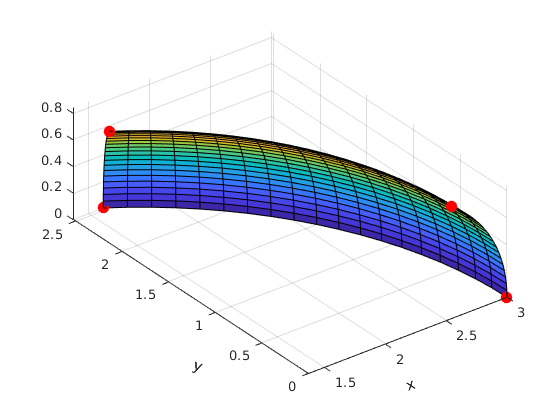

In [3]:
cx_1 = (2 + cos(t_a)).*cos(s_a);
cy_1 = (2 + cos(t_a)).*sin(s_a);
cz_1 = sin(t_a);

cx_2 = (2 + cos(t_b)).*cos(s_a);
cy_2 = (2 + cos(t_b)).*sin(s_a);
cz_2 = sin(t_b);

cx_3 = (2 + cos(t_b)).*cos(s_b);
cy_3 = (2 + cos(t_b)).*sin(s_b);
cz_3 = sin(t_b);

cx_4 = (2 + cos(t_a)).*cos(s_b);
cy_4 = (2 + cos(t_a)).*sin(s_b);
cz_4 = sin(t_a);

surf(x, y, z);axis equal; xlabel('x', 'Rotation',20); ylabel('y', 'Rotation',-20); hold on;
plot3(cx_1, cy_1, cz_1, 'r.', 'MarkerSize', 30);
plot3(cx_2, cy_2, cz_2, 'r.', 'MarkerSize', 30);
plot3(cx_3, cy_3, cz_3, 'r.', 'MarkerSize', 30);
plot3(cx_4, cy_4, cz_4, 'r.', 'MarkerSize', 30)
saveas(gcf,'Relazione/img/cornerPatch','epsc')

# Costruzione della matrice C

Il patch può essere scritto usando la base di Hermite con tale formula:

$\mathbf{X}(s,t) = \mathbf{H}^T(s)\mathbf{CH}(t)$

dove 

$H^3_0(t) = 1 - 3t^2 + 2t^3, H^3_1(t) = t -2t^2 + t^3, H^3_2(t) = t^3 - t^2, H^3_3(t) = 3t^2 - 2t^3$

e dove 

$\mathbf{H}(t) = (H^3_0(t), H^3_1(t), H^3_2(t), H^3_3(t))$.

La matrice $\mathbf{C}$ è data dai corner della superficie e dalle derivate sui parametri $(s, t) \in [0, 1]^2$:

$ \mathbf{C} = 
\begin{pmatrix}
\mathbf{X}(0,0) & \mathbf{X}_t(0,0) & \mathbf{X}_t(0,1) & \mathbf{X}(0,1) \\
\mathbf{X}_s(0,0) & \mathbf{X}_{st}(0,0) & \mathbf{X}_{st}(0,1) & \mathbf{X}_s(0,1) \\
\mathbf{X}_s(1,0) & \mathbf{X}_{st}(1,0) & \mathbf{X}_{st}(1,1) & \mathbf{X}_s(1,1) \\
\mathbf{X}(1,0) & \mathbf{X}_t(1,0) & \mathbf{X}_t(1,1) & \mathbf{X}(1,1) 
\end{pmatrix}  $

Questa matrice è costituita da tre piani.

Definiamo le derivate per le funzioni su $(x, y, z)$:

In [4]:
C = zeros(4,4,3);

syms s t f_x(s,t) f_y(s,t) f_z(s,t)

f_x(s,t) = (2 + cos(t)).*cos(s);
f_y(s,t) = (2 + cos(t)).*sin(s);
f_z(s,t) = sin(t);

df_xt = diff(f_x, t);
df_xs = diff(f_x, s);
df_xst = diff(f_x, s, t);

df_yt = diff(f_y, t);
df_ys = diff(f_y, s);
df_yst = diff(f_y, s, t);

df_zt = diff(f_z, t);
df_zs = diff(f_z, s);
df_zst = diff(f_z, s, t);

## Matrice C

La costruzione per ogni piano è uguale. Qui vediamo in dettaglio la matrice per il piano $X$

In [5]:
C_x = zeros(4,4);

s_a = 0; s_b = 1;
t_a = 0; t_b = 1;

C_x(1,1) = f_x(s_a, t_a);
C_x(1,2) = df_xt(s_a, t_a);
C_x(2,1) = df_xs(s_a, t_a);
C_x(2,2) = df_xst(s_a, t_a);

C_x(1,4) = f_x(s_a, t_b);
C_x(1,3) = df_xt(s_a, t_b);
C_x(2,4) = df_xs(s_a, t_b);
C_x(2,3) = df_xst(s_a, t_b);

C_x(4,1) = f_x(s_b, t_a);
C_x(4,2) = df_xt(s_b, t_a);
C_x(3,1) = df_xs(s_b, t_a);
C_x(3,2) = df_xst(s_b, t_a);

C_x(4,4) = f_x(s_b, t_b);
C_x(4,3) = df_xt(s_b, t_b);
C_x(3,4) = df_xs(s_b, t_b);
C_x(3,3) = df_xst(s_b, t_b);

C_y = zeros(4,4);C_y(1,1) = f_y(s_a, t_a);C_y(1,2) = df_yt(s_a, t_a);C_y(2,1) = df_ys(s_a, t_a);C_y(2,2) = df_yst(s_a, t_a);C_y(1,4) = f_y(s_a, t_b);C_y(1,3) = df_yt(s_a, t_b);C_y(2,4) = df_ys(s_a, t_b);C_y(2,3) = df_yst(s_a, t_b);C_y(4,1) = f_y(s_b, t_a);C_y(4,2) = df_yt(s_b, t_a);C_y(3,1) = df_ys(s_b, t_a);C_y(3,2) = df_yst(s_b, t_a);C_y(4,4) = f_y(s_b, t_b);C_y(4,3) = df_yt(s_b, t_b);C_y(3,4) = df_ys(s_b, t_b);C_y(3,3) = df_yst(s_b, t_b);
C_z = zeros(4,4);C_z(1,1) = f_z(s_a, t_a);C_z(1,2) = df_zt(s_a, t_a);C_z(2,1) = df_zs(s_a, t_a);C_z(2,2) = df_zst(s_a, t_a);C_z(1,4) = f_z(s_a, t_b);C_z(1,3) = df_zt(s_a, t_b);C_z(2,4) = df_zs(s_a, t_b);C_z(2,3) = df_zst(s_a, t_b);C_z(4,1) = f_z(s_b, t_a);C_z(4,2) = df_zt(s_b, t_a);C_z(3,1) = df_zs(s_b, t_a);C_z(3,2) = df_zst(s_b, t_a);C_z(4,4) = f_z(s_b, t_b);C_z(4,3) = df_zt(s_b, t_b);C_z(3,4) = df_zs(s_b, t_b);C_z(3,3) = df_zst(s_b, t_b);

C(:,:,1) = C_x;
C(:,:,2) = C_y;
C(:,:,3) = C_z


C(:,:,1) =

    3.0000         0   -0.8415    2.5403
         0         0         0         0
   -2.5244         0    0.7081   -2.1376
    1.6209         0   -0.4546    1.3725


C(:,:,2) =

         0         0         0         0
    3.0000         0   -0.8415    2.5403
    1.6209         0   -0.4546    1.3725
    2.5244         0   -0.7081    2.1376


C(:,:,3) =

         0    1.0000    0.5403    0.8415
         0         0         0         0
         0         0         0         0
         0    1.0000    0.5403    0.8415



# Patch bicubico in forma di Hermite

Definiamo le funzione della base di Hermite e scriviamo $\mathbf{X}(s,t) = \mathbf{H}^T(s)\mathbf{CH}(t)$ per i tre piani.

Una volta definito il patch lo utiliziamo per la visualizzazione.

Elapsed time is 16.201942 seconds.


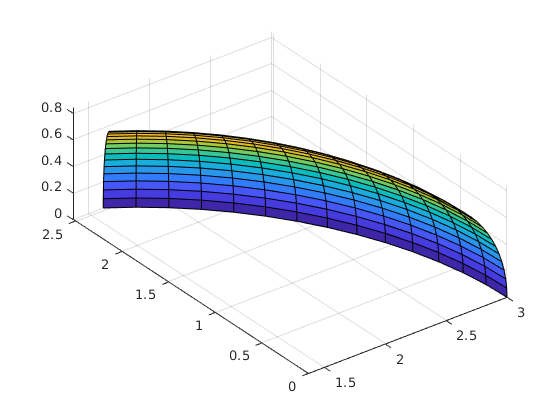

In [6]:
syms H_0_t(t) H_1_t(t) H_2_t(t) H_3_t(t) H_0_s(s) H_1_s(s) H_2_s(s) H_3_s(s)

H_0_t(t) = 1 - 3*t.^2 + 2.*t.^3;
H_1_t(t) = t - 2*t.^2 + t.^3;
H_2_t(t) = t.^3 - t.^2;
H_3_t(t) = 3*t.^2 - 2*t.^3;

H_0_s(s) = 1 - 3*s.^2 + 2*s.^3;
H_1_s(s) = s - 2*s.^2 + s.^3;
H_2_s(s) = s.^3 - s.^2;
H_3_s(s) = 3*s.^2 - 2*s.^3;

H_t = [H_0_t(t); H_1_t(t); H_2_t(t); H_3_t(t)];
H_s = [H_0_s(s); H_1_s(s); H_2_s(s); H_3_s(s)];

X_st = symfun((H_s.') * C(:,:,1) * H_t, [s,t]);
Y_st = symfun((H_s.') * C(:,:,2) * H_t, [s,t]);
Z_st = symfun((H_s.') * C(:,:,3) * H_t, [s,t]);

prec = 15;
X_hermite = zeros(prec, prec);
Y_hermite = zeros(prec, prec);
Z_hermite = zeros(prec, prec);

u = linspace(s_a, s_b, prec);
v = linspace(t_a, t_b, prec);
tic;
for i = 1:prec
    for j = 1:prec
        X_hermite(i,j) = X_st(u(i), v(j));
        Y_hermite(i,j) = Y_st(u(i), v(j));
        Z_hermite(i,j) = Z_st(u(i), v(j));
    end
end
toc;
surf(X_hermite,Y_hermite,Z_hermite); axis equal;
saveas(gcf,'Relazione/img/hermitePatch','epsc')

# Errore di interpolazione

In [7]:
prec = 15;
s_a = 0; s_b = 1;
s = linspace(s_a, s_b, prec);
t_a = 0; t_b = 1;
t = linspace(t_a, t_b, prec);
[ss, tt] = meshgrid(s, t);
X = (2 + cos(tt)).*cos(ss);
Y = (2 + cos(tt)).*sin(ss);
Z = sin(tt);

norm(abs(X_hermite - X'))
norm(abs(Y_hermite - Y'))
norm(abs(Z_hermite - Z'))

% max(abs(X_hermite - X),[],'all')
% max(abs(Y_hermite - Y),[],'all')
% max(abs(Z_hermite - Z),[],'all')


ans =

    0.0717


ans =

    0.0396


ans =

    0.0114



## Conversione in forma di Bezier

Possiamo trasformare il patch dalla forma di Hermite alla forma di Bezier usando semplici calcoli.

Il patch in forma di Bezier è così definito:

$\mathbf{X}(s,t) = \mathbf{B}^T(s)\mathbf{M B}(t)$

dove 

$B^3_0(t) = (1 - t)^3, B^3_1(t) = 3*t*(1 - t)^2, B^3_2(t) = 3*t^2*(1 - t), B^3_3(t) = t^3$

e dove 

$\mathbf{B}(t) = (B^3_0(t), B^3_1(t), B^3_2(t), B^3_3(t))$.

In [8]:
%%file bezier_matrix.m
function M = bezier_matrix(C)
    M = zeros(4, 4);

    M(1, 1) = C(1, 1);
    M(1, 4) = C(1, 4);
    M(4, 1) = C(4, 1);
    M(4, 4) = C(4, 4);

    M(1, 2) = C(1, 1) + C(1, 2)/3;
    M(2, 1) = C(1, 1) + C(2, 1)/3;
    M(2, 2) = C(1, 1) + C(1, 2)/3 + C(2, 1)/3 + C(2, 2)/9;

    M(3, 1) = C(4, 1) - C(3, 1)/3;
    M(4, 2) = C(4, 1) + C(4, 2)/3;
    M(3, 2) = C(4, 1) + C(4, 2)/3 - C(3, 1)/3 + C(3, 2)/9;

    M(2, 4) = C(1, 4) + C(2, 4)/3;
    M(1, 3) = C(1, 4) - C(1, 3)/3;
    M(2, 3) = C(1, 4) + C(2, 4)/3 - C(1, 3)/3 - C(2, 3)/9;

    M(3, 4) = C(4, 4) - C(3, 4)/3;
    M(4, 3) = C(4, 4) - C(4, 3)/3;
    M(3, 3) = C(4, 4) - C(4, 3)/3 - C(3, 4)/3 + C(3, 3)/9;
end

Created file '/home/mame/git/cagd/bezier_matrix.m'.


In [9]:
%%file full_bezier_matrix.m
function M = full_bezier_matrix(C_x, C_y, C_z)
    M = zeros(4, 4, 3);

    M(:,:, 1) = bezier_matrix(C_x);
    M(:,:, 2) = bezier_matrix(C_y);
    M(:,:, 3) = bezier_matrix(C_z);
end

Created file '/home/mame/git/cagd/full_bezier_matrix.m'.


In [10]:
M = full_bezier_matrix(C_x, C_y, C_z)


M(:,:,1) =

    3.0000    3.0000    2.8208    2.5403
    3.0000    3.0000    2.8208    2.5403
    2.4624    2.4624    2.3153    2.0851
    1.6209    1.6209    1.5241    1.3725


M(:,:,2) =

         0         0         0         0
    1.0000    1.0000    0.9403    0.8468
    1.9841    1.9841    1.8656    1.6801
    2.5244    2.5244    2.3736    2.1376


M(:,:,3) =

         0    0.3333    0.6614    0.8415
         0    0.3333    0.6614    0.8415
         0    0.3333    0.6614    0.8415
         0    0.3333    0.6614    0.8415



## Costruzione della forma di Bezier

Definiamo le funzioni di base e il patch.

In [11]:
syms  Ber_0_t(t) Ber_1_t(t) Ber_2_t(t) Ber_3_t(t) Ber_0_s(s) Ber_1_s(s) Ber_2_s(s) Ber_3_s(s)
Ber_0_t(t) = (1 - t).^3;
Ber_1_t(t) = 3*t*(1 - t).^2;
Ber_2_t(t) = 3*t.^2*(1 - t);
Ber_3_t(t) = t.^3;

Ber_0_s(s) = (1 - s).^3;
Ber_1_s(s) = 3*s*(1 - s).^2;
Ber_2_s(s) = 3*s.^2*(1 - s);
Ber_3_s(s) = s.^3;

Ber_t = [Ber_0_t(t); Ber_1_t(t); Ber_2_t(t); Ber_3_t(t)];
Ber_s = [Ber_0_s(s); Ber_1_s(s); Ber_2_s(s); Ber_3_s(s)];

XB_st = symfun((Ber_s.') * M(:,:,1) * Ber_t, [s,t]);
YB_st = symfun((Ber_s.') * M(:,:,2) * Ber_t, [s,t]);
ZB_st = symfun((Ber_s.') * M(:,:,3) * Ber_t, [s,t]);

## Controllo di equivalenza 

Controlliamo che il patch in forma di Bezier sia uguale a quello in forma di Hermite

In [12]:
assume(s_a <= s <= s_b)
assume(t_a <= t <= t_b)
isAlways(abs(X_st - XB_st) <  1.0e-13 )
isAlways(abs(Y_st - YB_st) <  1.0e-13 )
isAlways(abs(Z_st - ZB_st) <  1.0e-13 )


ans =

  logical

   1


ans =

  logical

   1


ans =

  logical

   1



Disegnamo infine il patch in forma di Bezier.

Elapsed time is 15.522220 seconds.


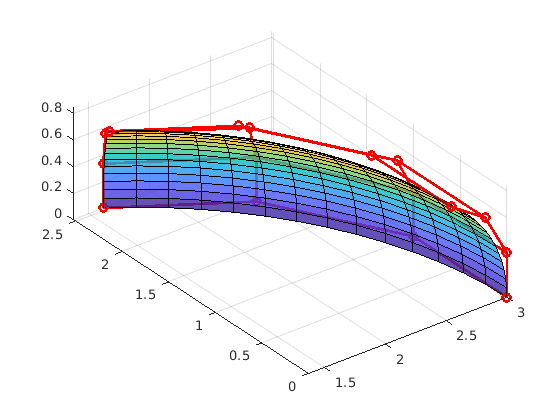

In [13]:
prec = 15;
X = zeros(prec, prec);
Y = zeros(prec, prec);
Z = zeros(prec, prec);

u = linspace(0, 1, prec);
v = linspace(0, 1, prec);
tic;
for i = 1:prec
    for j = 1:prec
        X(i,j) = XB_st(u(i), v(j));
        Y(i,j) = YB_st(u(i), v(j));
        Z(i,j) = ZB_st(u(i), v(j));
    end
end
toc;
surf(X,Y,Z,'FaceAlpha', .8);axis equal;hold on;
plot3(M(:,:,1), M(:,:,2), M(:,:,3), 'ro-', 'linewidth', 2); hold on;
plot3(M(:,:,1)', M(:,:,2)', M(:,:,3)', 'ro-', 'linewidth', 2); hold on;
saveas(gcf,'Relazione/img/deCasteljauPatch','epsc')

In [14]:
%%file deCasteljau.m
function [c] = deCasteljau(P, n, u)
    Q = P;
    for k = 2:n + 1
        for i = 1:n - k + 1
            Q(:,i,:) = (1-u) * Q(:,i,:) + u*Q(:,i+1,:);
        end
    end
    c = [Q(1,1,1), Q(1,1,2), Q(1,1,3)]';
end

Created file '/home/mame/git/cagd/deCasteljau.m'.


In [15]:
%%file deCasteljau2.m
function [s] = deCasteljau2(P, n, u0, v0)
    Q = zeros(1, n, 3);
    for i = 1:n
        Q(:,i,:) = deCasteljau(P(i,:,:), n, v0);
    end
    s =  deCasteljau(Q, n, u0);
end

Created file '/home/mame/git/cagd/deCasteljau2.m'.


In [25]:
%%file plotDeCasteljau.m
function [X,Y,Z] = plotDeCasteljau(P, precision)
    X = zeros(precision,precision);
    Y = zeros(precision,precision);
    Z = zeros(precision,precision);
    u0 = linspace(0, 1, precision);
    v0 = linspace(0, 1, precision);
    for i = 1:precision
        for j = 1:precision
            s = deCasteljau2(P, 4, u0(i), v0(j));
            X(i,j) = s(1);
            Y(i,j) = s(2);
            Z(i,j) = s(3);
        end
    end
%     surf(X, Y, Z, 'FaceAlpha', .8); axis equal;hold on;
end

Created file '/home/mame/git/cagd/plotDeCasteljau.m'.


Elapsed time is 0.345484 seconds.


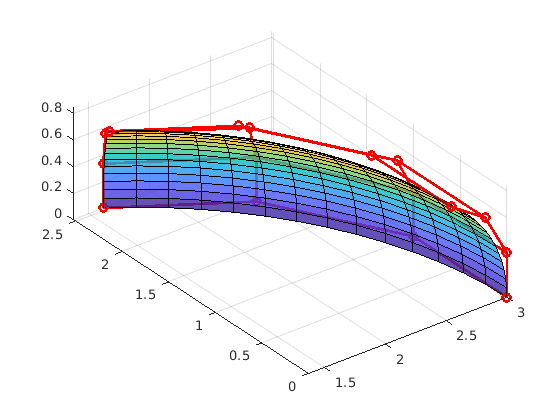

In [17]:
P = zeros(4,4,3);
P(:,:,1) = M(:,:,1);
P(:,:,2) = M(:,:,2);
P(:,:,3) = M(:,:,3);
tic;
plotDeCasteljau(P, 15);
toc;
plot3(M(:,:,1), M(:,:,2), M(:,:,3), 'ro-', 'linewidth', 2); hold on;
plot3(M(:,:,1)', M(:,:,2)', M(:,:,3)', 'ro-', 'linewidth', 2); hold on;

# Generalizzazione al caso spline

In [18]:
%%file hermite_matrix_spine.m
function [C_ij] = hermite_matrix_spine(f_x,s_a,s_b,t_a,t_b,du,dv)
    syms t s
    C_ij = zeros(4, 4);
    
    df_xt = diff(f_x, t);
    df_xs = diff(f_x, s);
    df_xst = diff(f_x, s, t);
    
    C_ij(1,1) = f_x(s_a, t_a);
    C_ij(1,2) = dv*df_xt(s_a, t_a);
    C_ij(2,1) = du*df_xs(s_a, t_a);
    C_ij(2,2) = du*dv*df_xst(s_a, t_a);

    C_ij(1,4) = f_x(s_a, t_b);
    C_ij(1,3) = dv*df_xt(s_a, t_b);
    C_ij(2,4) = du*df_xs(s_a, t_b);
    C_ij(2,3) = du*dv*df_xst(s_a, t_b);

    C_ij(4,1) = f_x(s_b, t_a);
    C_ij(4,2) = dv*df_xt(s_b, t_a);
    C_ij(3,1) = du*df_xs(s_b, t_a);
    C_ij(3,2) = du*dv*df_xst(s_b, t_a);

    C_ij(4,4) = f_x(s_b, t_b);
    C_ij(4,3) = dv*df_xt(s_b, t_b);
    C_ij(3,4) = du*df_xs(s_b, t_b);
    C_ij(3,3) = du*dv*df_xst(s_b, t_b);
end

Created file '/home/mame/git/cagd/hermite_matrix_spine.m'.


In [19]:
%%file full_hermite_matrix_spine.m
function [C] = full_hermite_matrix_spine(f_x, f_y, f_z, s_a, s_b, t_a, t_b, du, dv)
    C = zeros(4,4,3);

    C(:,:,1) = hermite_matrix_spine(f_x, s_a, s_b, t_a, t_b, du, dv);
    C(:,:,2) = hermite_matrix_spine(f_y, s_a, s_b, t_a, t_b, du, dv);
    C(:,:,3) = hermite_matrix_spine(f_z, s_a, s_b, t_a, t_b, du, dv);
end

Created file '/home/mame/git/cagd/full_hermite_matrix_spine.m'.


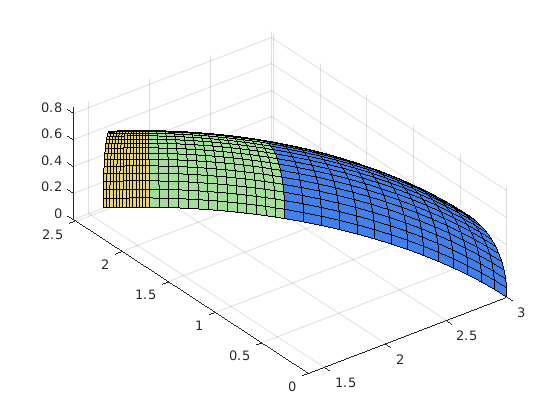

In [26]:
n = 3; m = 1;
indexes_i = linspace(1, n, n);
indexes_j = linspace(1, m, m);

prec = 15;

u_i = [0, .6, .9, 1];
v_j = [0, 1];
du_i = zeros(1, n);
dv_j = zeros(1, m);

for k = indexes_i
    du_i(k) = u_i(k + 1) - u_i(k);
end

for k = indexes_j
    dv_j(k) = v_j(k + 1) - v_j(k);
end

colors = [[20, 98, 229];[141, 214, 130];[227, 201, 83]]/255;
for i = indexes_i
    for j = indexes_j
        C = full_hermite_matrix_spine(f_x, f_y, f_z, u_i(i), u_i(i + 1), v_j(j), v_j(j + 1), du_i(i), dv_j(j));
        P = full_bezier_matrix(C(:,:,1),C(:,:,2),C(:,:,3));
        [X,Y,Z] = plotDeCasteljau(P, prec);
        surf(X, Y, Z, 'FaceAlpha', .8, 'FaceColor', colors(i,:)); axis equal;hold on;
    end
end

saveas(gcf,'Relazione/img/splinePatch','epsc')

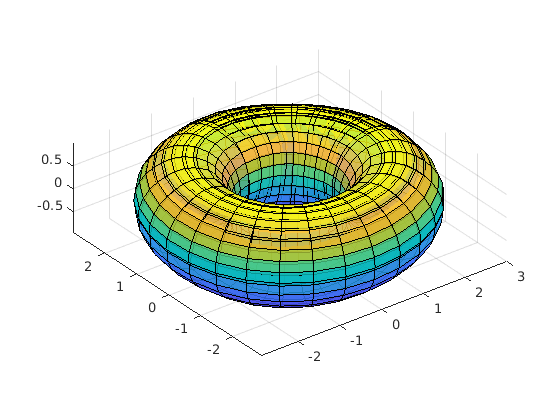

In [21]:
n = 4; m = 4;
indexes_i = linspace(1, n, n);
indexes_j = linspace(1, m, m);

prec = 10;

u_i = linspace(0, 8, n + 1);
v_j = linspace(0, 8, m + 1);
du_i = zeros(1, n);
dv_j = zeros(1, m);

for k = indexes_i
    du_i(k) = u_i(k + 1) - u_i(k);
end

for k = indexes_j
    dv_j(k) = v_j(k + 1) - v_j(k);
end

for i = indexes_i
    for j = indexes_j
        C = full_hermite_matrix_spine(f_x, f_y, f_z, u_i(i), u_i(i + 1), v_j(j), v_j(j + 1), du_i(i), dv_j(j));
        P = full_bezier_matrix(C(:,:,1),C(:,:,2),C(:,:,3));
        [X_hermite, Y_hermite, Z_hermite] = plotDeCasteljau(P, prec);
    end
end
saveas(gcf,'Relazione/img/splineFullPatch','epsc')


ans =

    0.0054


ans =

    0.0075


ans =

   1.3694e-04



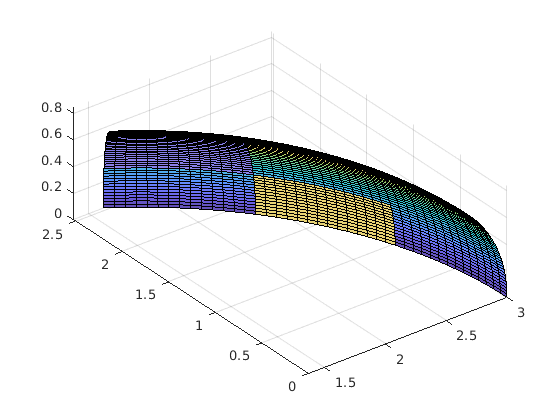

In [22]:
n = 3; m = 3;
indexes_i = linspace(1, n, n);
indexes_j = linspace(1, m, m);

prec = 15;

u_i = linspace(0, 1, n + 1);
v_j = linspace(0, 1, m + 1);
du_i = zeros(1, n);
dv_j = zeros(1, m);

for k = indexes_i
    du_i(k) = u_i(k + 1) - u_i(k);
end

for k = indexes_j
    dv_j(k) = v_j(k + 1) - v_j(k);
end

X_norms = [];
Y_norms = [];
Z_norms = [];
colors = [[107, 98, 229];[141, 214, 130];[227, 201, 83]]/255;

for i = indexes_i
    for j = indexes_j
        C = full_hermite_matrix_spine(f_x, f_y, f_z, u_i(i), u_i(i + 1), v_j(j), v_j(j + 1), du_i(i), dv_j(j));
        P = full_bezier_matrix(C(:,:,1),C(:,:,2),C(:,:,3));
        [X_hermite, Y_hermite, Z_hermite] = plotDeCasteljau(P, prec);
        surf(X_hermite, Y_hermite, Z_hermite, 'FaceAlpha', .8, 'FaceColor', colors(mod(i,3)+1,:)); axis equal;hold on;
        
        u = linspace(u_i(i), u_i(i + 1), prec);
        v = linspace(v_j(j), v_j(j + 1), prec);
        [uu, vv] = meshgrid(u, v);
        X = (2 + cos(vv)).*cos(uu);
        Y = (2 + cos(vv)).*sin(uu);
        Z = sin(vv);
        X_norms(end + 1) = norm(abs(X_hermite - X'));
        Y_norms(end + 1) = norm(abs(Y_hermite - Y'));
        Z_norms(end + 1) = norm(abs(Z_hermite - Z'));
    end
end

mean(X_norms)
mean(Y_norms)
mean(Z_norms)